In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats

In [2]:
linPath = '/home/marteswong/CCD/CCD linearity dim/data/'
# lin_5 = '5_0_230915-154051.dat'
# lin_10 = '10_0_230915-154039.dat'
# lin_18 = '18_0_230915-154025.dat'
# lin_24 = '24_0_230915-154019.dat'
# lin_32 = '32_0_230915-154009.dat'
# lin_40 = '40_0_230915-154004.dat'
# lin_48 = '48_0_230915-153947.dat'
# lin_56 = '56_0_230915-153935.dat'
# lin_64 = '64_0_230915-153926.dat'
# lin_72 = '72_0_230915-153918.dat'
# lin_80 = '80_0_230915-153902.dat'
# lin_86 = '86_0_230915-153852.dat'
# lin_92 = '92_0_230915-153843.dat'
# lin_98 = '98_0_230915-153825.dat'
# lin_105 = '105_0_230915-153805.dat'
# lin_112 = '112.5_0_230915-153757.dat'
# lin_120 = '120_0_230915-153750.dat'
# lin_127 = '127.5_0_230915-153745.dat'
# lin_135 = '135_0_230915-153735.dat'


In [3]:
# Extract only the ROI of the data at different exposure time, convert the base from hex to dec
# and calculate the mean of each file within the ROI

loop = [5, 10, 18, 24, 32, 40, 48, 56, 64, 72, 80, 86, 92, 98, 105, 112.5, 120, 127.5, 135]
mean = []
data_dec = np.zeros((100,100))
count = 0

for n in loop:
    data_df = pd.read_csv(linPath + "{}_0.dat".format(n), delimiter=' ')
    # print(linPath + "{}_0.dat".format(n))
    data_array = np.array(data_df)[430:530, 590:690]
    # print(data_array)
    for i in range(len(data_array)):
        for j in range(len(data_array[i])):
            t = data_array[i][j]
            d = int(str(t), base=16)
            data_dec[i][j] = d
    # print(data_dec)
    # print(np.mean(data_dec))
    # print()
    mean.append(np.mean(data_dec))
    count += 1

# print(count)
    

/tmp/ipykernel_10086/473483644.py:10: DtypeWarning: Columns (24,33,58,59,69,70,75,76,80,83,86,87,88,90,92,93,94,95,96,103,104,107,117,118,120,121,122,124,126,127,130,131,133,134,137,142,146,147,150,154,156,157,158,160,161,164,166,168,169,175,179,180,181,182,186,188,193,194,196,200,202,204,206,209,210,211,212,214,215,217,221,224,225,226,230,231,232,233,234,237,242,243,245,246,247,248,249,253,255,256,257,259,260,261,262,264,266,271,272,273,274,275,276,278,279,282,284,285,286,289,290,292,293,298,302,306,307,309,311,312,314,317,319,322,325,329,330,336,339,342,343,344,354,361,362,365,366,369,373,376,377,380,381,382,383,389,390,391,394,396,398,399,401,402,403,405,406,409,412,414,416,417,418,421,422,423,426,429,430,431,432,433,434,436,440,441,445,448,449,450,452,453,454,455,462,463,465,468,470,472,476,479,480,482,483,484,485,490,504,505,508,512,514,515,520,522,524,526,530,532,533,534,540,542,544,551,552,554,555,557,560,570,571,574,575,576,578,580,581,582,584,585,586,587,588,591,592,593,596,59

In [4]:
print(mean)

[10.7663, 22.6933, 41.0507, 54.6808, 72.3028, 88.5558, 109.9261, 127.1246, 142.1541, 161.7844, 180.2842, 193.4961, 207.1888, 221.1938, 235.7292, 250.7111, 255.0, 255.0, 255.0]


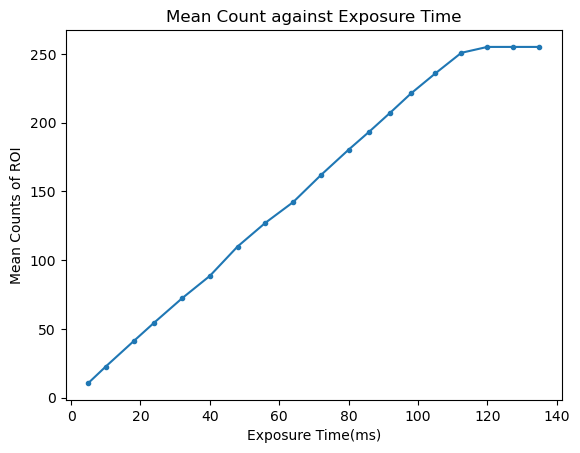

In [5]:
# Plot the mean count against exposure time
plt.plot(loop, mean, marker = '.')
plt.title("Mean Count against Exposure Time")
plt.xlabel("Exposure Time(ms)")
plt.ylabel("Mean Counts of ROI")
plt.savefig(linPath + "linearity.eps", format='eps')

In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(loop[:15], mean[:15])
res = stats.linregress(loop[:15], mean[:15])

x = [loop[0], loop[14]]
y = [x[0]*slope+intercept, x[1]*slope + intercept]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


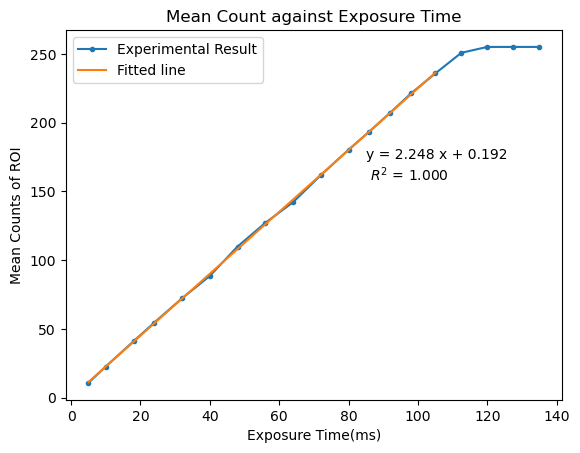

In [14]:
plt.plot(loop, mean, marker = '.', label = "Experimental Result")
plt.plot(x,y,label = "Fitted line")
plt.title("Mean Count against Exposure Time")
plt.xlabel("Exposure Time(ms)")
plt.ylabel("Mean Counts of ROI")
plt.legend()
plt.text(85,158,"y = {:.3f} x + {:.3f}\n $R^2$ = {:.3f}".format(slope, intercept, r_value**2))
plt.savefig(linPath + "linearityFitted.eps", format='eps')